# Introduction to deep learning
Benny Avelin
<p><a href="https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg#/media/File:Colored_neural_network.svg">
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" width=300px alt="Colored neural network.svg">
        </a>
        </center>
        <br>
        <font size="1">By <a href="//commons.wikimedia.org/wiki/User_talk:Glosser.ca" title="User talk:Glosser.ca">Glosser.ca</a> - <span class="int-own-work" lang="en">Own work</span>, Derivative of <a href="//commons.wikimedia.org/wiki/File:Artificial_neural_network.svg" title="File:Artificial neural network.svg">File:Artificial neural network.svg</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=24913461">Link</a>
    </p>
    </font>

# Overview (session 2)

* Quick recap of the definition
* Detour into VC-theory and generalization bounds
* Why Deep Neural Networks are difficult
* ??

# Previously
A single artificial neuron can then be represented as
$$
    h(x) = \sigma(w \cdot x + b)
$$
where $w$ and $b$ are the weights. $\sigma:\R \to \R$ is an activation function, for instance
* Sigmoid $\frac{1}{1+e^{-x}}$
* ReLu (Rectified Linear unit) $\sigma(x)=\max(0,x)$

# Previously
We can make more complicated models by adding more neurons, i.e. let us consider:
$$
    f(x) = \sum_{j=1}^k v^j h_{w^j,b^j}(x)
$$

this is what is known as a feed forward neural network with a single hidden layer.

<center>
    <img src="SingleHidden.png" width=350px>
</center>

In the context of neural networks we let $\sigma: \mathbb{R} \to \mathbb{R}$ and with $\sigma(x)$ where $x \in \mathbb{R}^n$ we apply componentwise. Denote

$$W^T = (w^1,\ldots, w^k)$$
$$B^T = (b_1,\ldots,b_k)$$
$$v^T = (v_1,\ldots,v_k)$$

then we can write $f$ as
$$
    f(x) = v^T \sigma(Wx+B)
$$

In fact if we introduce $W^{(1)},B^{(1)},W^{(2)},B^{(2)}$ we can consider

$$
\begin{align}
    f^{(1)}(x) &= \sigma(W^{(1)} x + B^{(1)})\\
    f^{(2)}(x) &= \sigma(W^{(2)} f^{(1)}(x) + B^{(2)}) \\
    f(x) &= v^T f^{(2)}(x)
\end{align}
$$

<center>
    <img src="ManyHidden.png" width=600px>
</center>

# Definitions (Skip)
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\H}{\mathcal{H}}$
$\newcommand{\VCdim}{\text{VC-dim}(\H)}$

# Risk & hypothesis
* Let us consider data $(x,y) \sim \mu$, where $x \in \R^n$ and $y \in \R^m$. 

* A hypothesis is a function $h: \R^n \to \R^m$

* A loss-function $L:\R^m \times \R^m \to \R_+$
$$R(h) = \E_{\mu}\left[L(h(x),y)\right], \quad \textbf{Risk}$$

* Given a data-set $D = \{(x_1,y_1), \ldots (x_N,y_N)\}$ which are sampled i.i.d. from $\mu$ we also define
$$R_{emp,D} (h) = \frac{1}{N}\sum_{i=1}^N \left[L(h(x_i),y_i)\right], \quad \textbf{Empirical Risk}$$

* Call a set of hypothesis $\H$ the hypothesis space

# Goal

* Find $h^\ast \in \H$ such that
$$R(h^\ast) = \min_{\H} R(h)$$

* We dont have access to $\mu$ but we have access to the data-set $D$, we could try to find $h_D^\ast \in \H$ such that
$$R_{emp,D}(h_D^\ast) = \min_{\H} R_{emp,D}(h)$$

* We cannot find $h_D^\ast$ in general. Instead we try to find $h \in \H$ such that $R_{emp,D}(h)$ is as small as possible
$$R_{emp,D}(h_D^\ast) \leq R_{emp,D}(h)$$

# Generalization
The **generalization gap** is the difference between $R(h)$ and $R_{emp,D}(h),$ we would like to know that

$$\mathbb{P}\left[\sup_{h \in \mathcal{H}} |R(h) - R_{\text{emp}}(h)| > \epsilon\right] \quad \text{is small}$$

We are taking the probability over data-sets $D$ sampled from $\mu$ all with the same size.

* Given $h$ we get from the weak law of large numbers that
$$\lim_{N \rightarrow \infty} \mathbb{P}\left[\left|R(h) - R_{\text{emp}}(h)\right| > \epsilon \right] = 0, \quad \text{too weak}$$
$N$ is the sample size.

* Hoeffdings inequality (Assuming $R(h), R_{\text{emp}}(h) \leq 1$):
$$\mathbb{P}\left[|R(h) - R_{\text{emp}}(h)| > \epsilon \right ] \leq 2\exp(-2N\epsilon^2)$$

* If $|\H|$ is finite we could use the union bound and Hoeffdings inequality to get
$$\mathbb{P}\left[\sup_{h \in \mathcal{H}}|R(h) - R_\text{emp}(h)| > \epsilon\right] \leq 
2|\mathcal{H}|\exp(-2N\epsilon^2)$$

**Symmetrization Lemma (Vapnik, Chervonenkis):** Let $D$ and $D'$ be two different sample data-sets from $\mu$ then
$$\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    \leq 2\mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right| > \frac{\epsilon}{2}\right]
\end{multline}
$$

* Lets simplify things, assume that our hypothesis has output in $\{-1,1\}$ i.e. two classes.
* Define equivalence classes on $\H$ with respect to $D$
$$h_1 = h_2, \iff h_1(x) = h_2(x), \forall (x,.) \in D$$
* The set of classes is denoted $\H_D$, note that $|\H_D| < \infty$.

$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \H_{D\cup D'}}\left|R_\text{emp}(h) - R_\text{emp}'(h)\right|>\frac{\epsilon}{2}\right] \\
    \leq \left|\mathcal{H}_{D\cup D'}\right| \sup_{h \in \H_{D\cup D'}} \mathbb{P}\left[\left|R_\text{emp}(h) - R_\text{emp}'(h)\right|>\frac{\epsilon}{2}\right]
\end{multline}
$$

# Growth function (shattering number)

The largest size of $\H_D$ for a given $N$ is called the shattering number for $\H$ given $N$
$$s(\H,N) = \sup_{x_1,\ldots, x_N} |\H_{\{x_1,\ldots,x_N\}}|$$
> **Note:** this is a combinatorial number and does not depend on $\mu$.

So, for any two data-sets $D,D'$ we get
$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \H_{D\cup D'}}\left|R_\text{emp}(h) - R_\text{emp}'(h)\right|>\frac{\epsilon}{2}\right] \\
    \leq s(\H,N) \sup_{h \in \H_{D\cup D'}}  \mathbb{P}\left[\left|R_\text{emp}(h) - R_\text{emp}'(h)\right|>\frac{\epsilon}{2}\right]
\end{multline}
$$

# Can we bound $s(\H,N)$?

* If we knew nothing then the best we can do is (binary classification)
$$s(\H,N) \leq 2^N$$

* This is where **VC**(Vapnik Chervonenkis)-dimension comes in!

# Vapnik Chervonenkis dimension
**Def:** We say that $\H$ **shatters** a set $D = \{x_i,i=1,\ldots, N\}$ for any disjoint split $D_1,D_{-1}$ of $D$ we can find $h \in \H$ such that $h(D_1) = 1$, $h(D_{-1})=-1$.

**Def:** The VC-dimension of $\H$, denoted by $\text{VC-dim}(\H)$ , equals the largest integer n such that there exists a set of cardinality n that is shattered by $\H$.

# Sauer–Shelah lemma (1972)
Let $k = \text{VC-dim}(\H)$ then for $N > 0$ we get the following bound
$$
    s(\H,N) \leq \sum_{i=0}^{k-1} {N \choose i}
$$

* Independently proved by Sauer and Shelah in 1972
* Actually proved slightly before by Vapnik and Chervonenkis (1971?)

$$s(\H,N) \leq \left ( \frac{Ne}{k}\right )^k $$

Proof: Let $\lambda \in (0,1)$ then
$$
\tiny
\begin{align}
    1 &= (\lambda + (1-\lambda))^N \\
    &\geq \sum_{i=1}^{\lambda N} {N \choose i} \lambda^i(1-\lambda)^{n-1} \\
    &\geq \sum_{i=1}^{\lambda N} {N \choose i} \left (\frac{\lambda}{1-\lambda} \right )^{\lambda n} (1-\lambda)^n
\end{align}
$$
Thus
$$
\tiny
\begin{align}
    \sum_{i=1}^{\lambda N} {N \choose i} &\leq e^{N((\lambda-1)\log(1-\lambda)-\lambda \log(1-\lambda))} \\
    &\leq e^{N(\lambda-\lambda \log(1-\lambda))} \\
    &= \left ( \frac{e N}{\lambda N} \right )^{\lambda N}
\end{align}
$$
Then for $k = \lambda N$ we have our result.

# Putting it all together

$$
\tiny
\begin{align}
    \mathbb{P}&\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    &\leq 2\mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right| > \frac{\epsilon}{2}\right] \quad \text{(Symmetrization Lemma)}\\
    &\leq 2 s(\H,2 N) \sup_{h \in \H_{D\cup D'}}  \mathbb{P}\left[\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right] \text{(Shattering number + Classes)}\\
    &\leq 2 s(\H,2 N) \sup_{h \in \H_{D\cup D'}}   \left ( \mathbb{P}\left[\left|R(h) - R_\text{emp,D}(h)\right|>\frac{\epsilon}{4}\right] + \mathbb{P}\left[\left|R(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{4}\right] \right ) \\
    &\leq 8 s(\H, 2N)\exp \left (-\frac{N\epsilon^2}{8} \right ) \quad \text{(Hoeffdings Inequality)} 
\end{align}
$$

# VC inequality (1971)

$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    \leq 8 s(\H,2N) \exp \left (-\frac{N\epsilon^2}{8} \right )
\end{multline}
$$

# VC generalization bound
Thus we can for any $\delta$ find that with probability $(1-\delta)$ the following estimate holds

$$
    R(h) \leq R_{emp,D} + \sqrt{\frac{8 \ln(s(\H,2N))+8\ln\frac{8}{\delta}}{N}}
$$

for any $h \in \H$.

# VC generalization bound

$$
    R(h) \leq R_{emp,D} + \sqrt{\frac{8 k\ln\left ( \frac{2Ne}{k}\right )+8\ln\frac{8}{\delta}}{N}}
$$
We need $N > ??$ in order for the estimate to be useful.

In [220]:
from scipy.optimize import fsolve

def find_N(k=1,prec=0.1):
    delta=0.1
    c = 8*k
    t = 8*k*np.log(2*np.e/k)+8*np.log(8/delta)
    func = lambda x: t+c*np.log(x)-prec*x
    x_init = k*100
    return fsolve(func,x_init)

In [225]:
k = np.arange(1,100)
N = np.array([find_N(k0,1) for k0 in k]).ravel()
def plot_numreq():
    plt.figure(figsize=(10,10))
    plt.plot(k,N)
    plt.xlabel("VC-dimension")
    plt.ylabel("Datapoints required")
    plt.show()

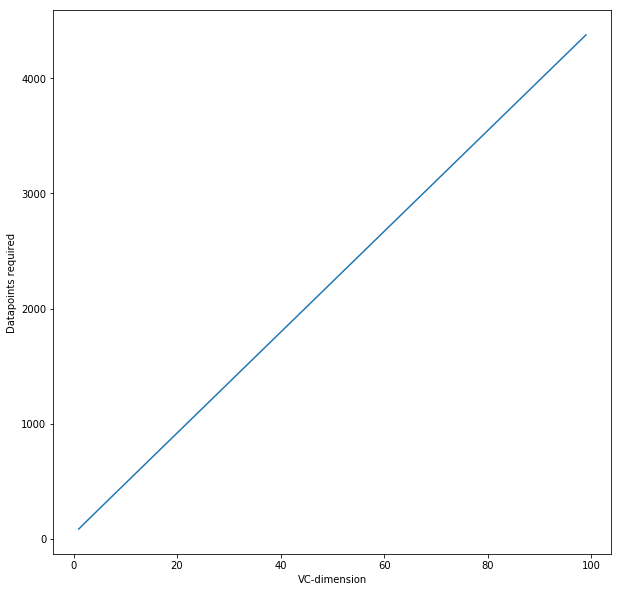

In [226]:
plot_numreq()

# VC dimension of Neural networks
Let $W$ be the total number of parameters of a network
* (Cover 1968, Baum & Haussler 1989) LTU (Linear Threshold unit) 
$$\VCdim \leq 2 W \log(eW)$$

* (Sontag 1992) $\phi(x) = \frac{1}{\pi} \arctan(x)+ \frac{1}{2} + \frac{cos(x)}{\alpha (1+x^2)}$
$$\VCdim = \infty$$

In [241]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,1000)
def plot_act(alpha=10):
    y = (1/np.pi)*np.arctan(x)+0.5 + np.cos(x)/(alpha*(1+x**2))
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    plt.title("$\\frac{1}{\\pi} \\arctan(x)+ \\frac{1}{2} + \\frac{cos(x)}{alpha (1+x^2)}$".replace('alpha',str(alpha)),fontsize=15,pad=20)
    plt.show()

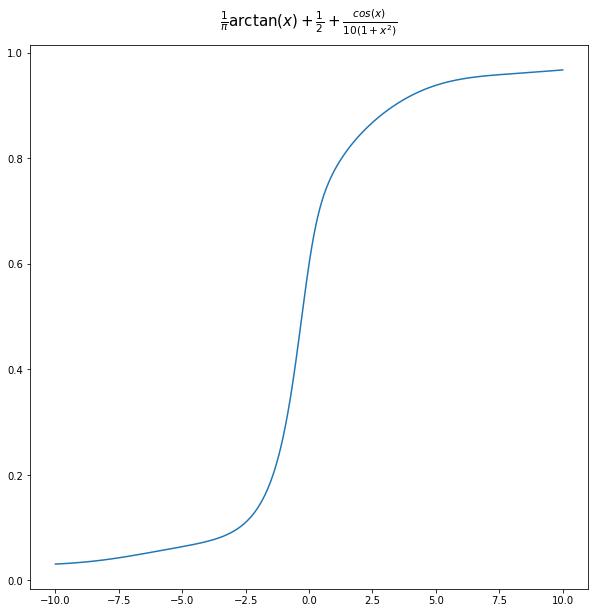

In [244]:
plot_act(alpha=10)

# VC dimension of Neural networks
Let $W$ be the total number of parameters of a network
* (Cover 1968, Baum & Haussler 1989) LTU (Linear Threshold unit) 
$$\VCdim \leq 2 W \log(eW)$$
* (Sontag 1992) $\phi(x) = \frac{1}{\pi} \arctan(x)+ \frac{1}{2} + \frac{cos(x)}{\alpha (1+x^2)}$
$$\VCdim = \infty$$

* (Karpinski & Macintyre 1994) Sigmoid activation 
$$\VCdim \leq C W^4$$

* (Bartlett, Harvey, Liaw, Mehrabian 2017) Piecewise linear 
$$\VCdim \leq LW log(pU)$$
Layers, Weights, pieces, Units

# The issue

* In the overparametrized regime we cannot get any information from the VC generalization bound, since in that case $N$ is much smaller than $W$.
    * Resnet110 is 1.7M parameters but performs really well on 50k images.
    * Other well performing networks are roughly 1M parameters for 50k images.

# Solution?
* Open problem

# Perceptron algorithm

The perceptron algorithm is a binary classifier and the idea is to "learn/find" the weights such that it maps its input to the correct class (1 or 0). 

**Given:**
Points $x_1,\ldots, x_N$ in $\mathbb{R}^n$, with a corresponding label $y_1,\ldots, y_N$ being either 1 or 0. 

**Goal:**
Find the weights $w$ and bias $b$ such that $h(x_i) = y_i$ for $i=1,\ldots,n$, if possible.

In [1]:
import numpy as np

def gen_data(n_points=5,sep=1):
    np.random.seed(1)
    X1 = np.random.normal(size=(n_points,2))+sep*np.array([0.5,0.5])
    X2 = np.random.normal(size=(n_points,2))+np.array([-1,-1])
    Xall = np.concatenate([X1,X2],axis=0)
    y1 = np.ones(shape=n_points)
    y2 = np.zeros(shape=n_points)
    yall = np.concatenate([y1,y2])

    X = np.concatenate([np.ones((n_points*2,1)), Xall],axis=1)
    return X,X1,X2,Xall,yall
X, X1, X2, Xall, yall = gen_data()

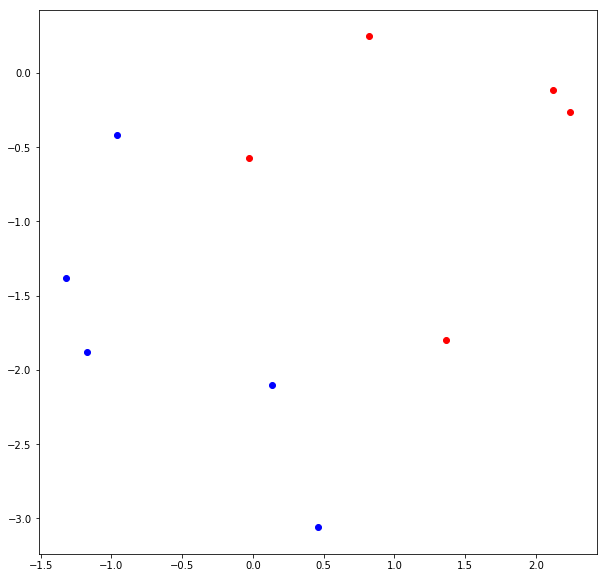

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X1[:,0],X1[:,1], color='red')
plt.scatter(X2[:,0],X2[:,1], color='blue')

# Perceptron algorithm
To simplify notation, raise the dimension and let the first coordinate of $x$ be $1$, then rearrange the weights such that the bias corresponds to the first component, then

1. Initialize the weights $w_0$ to some initial value.
2. For each data point $x_j$ in our data set do:
    1. Compute the "error"
$$
    e_j = (y_j - h_{w_t}(x_j))
$$
    2. Update the weights
$$
    w_{t+1} = w_t + \sum_{j=1}^n e_j \cdot x_j
$$
4. If the error $\sum_j |e_j|$ is too large goto step 2.

In [3]:
def perceptron(X,y,n_steps=10):
    # X = (n_points,3)
    # W = (n_points,3)
    W = -np.ones((X.shape[0],X.shape[1]))
    n_points = X.shape[0]
    f = lambda x: x>=0
    W = -np.ones(3)
    Wall = []
    for k in range(n_steps):
        for j in range(n_points-1):
            e = yall[j]-f(np.dot(X[j,:],W))
            W = W + e*X[j,:]
            Wall.append(W)

    x = np.linspace(np.min(X[:,1]),np.max(X[:,1]),2)
    W = np.array(Wall)
    u = (-W[1:,0].reshape(-1,1)-x.reshape(1,-1)*W[1:,1].reshape(-1,1))/W[1:,2].reshape(-1,1)
    
    return x,u
n_steps = 10
x,u = perceptron(X,yall,n_steps)

In [4]:
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
line, = ax.plot([], [], lw=1)
ax.scatter(X1[:,0],X1[:,1], color='red')
ax.scatter(X2[:,0],X2[:,1], color='blue')

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x, u[i,:])
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=u.shape[0], interval=200, blit=True)

plt.close(anim._fig)

In [5]:
HTML(anim.to_html5_video())

> **Theorem:** If the dataset is linearly separable then the perceptron algorithm is guaranteed to converge in a finite number of steps.

* What if the dataset is not linearly separable? Complete failure of training.
* Do we have stability, no there will be $\infty$ many solutions.

In [6]:
X,X1, X2, Xall, yall = gen_data(100,sep=4)

n_steps = 100

x,u = perceptron(X,yall,n_steps)
u = u[::1000,:]

from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
line, = ax.plot([], [], lw=1)
ax.scatter(X1[:,0],X1[:,1], color='red')
ax.scatter(X2[:,0],X2[:,1], color='blue')

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x, u[i,:])
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=u.shape[0], interval=200, blit=True)

plt.close(anim._fig)

In [7]:
HTML(anim.to_html5_video())

# Problems

* No convergence for non linearly-separable data.
* No stability
* The initial creators thought in terms of boolean functions, i.e. can we express
    * AND / OR ? Yes
    * Minsky and Papert remarked in 1969 that you cannot represent XOR with a perceptron, i.e.
    $$
        A \oplus B
    $$
* Can't we express more complicated functions by making networks of TLU's?
    * Yes, but how do we train them?

# Stability
* 1987 Krauth and Mezard published a paper solving the stability problem. 
* As it turns out this is essentially equivalent to Vapnik and Chervonenkis Support Vector Machine invented in 1963. 
* Cortes and Vapnik considered the soft margin in 1995. 

## Support vector machine
Consider the decision boundary for the perceptron
$$
    w \cdot x - b = 0.
$$
Introducing a margin we can actually look at
$$
    y_i(w \cdot x_i - b) \geq 1.
$$

Solve
$$
    \text{min} \|w\|^2 \text{ subject to } y_i (w \cdot x_i - b) \geq 1 \text{ for all } i = 1,\ldots, n.
$$

# Soft margin relaxation
$$
\left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\vec{w} \cdot \vec{x}_i - b)\right) \right] + \lambda\lVert \vec{w} \rVert^2
$$

In [8]:
def plot_svm():
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.datasets import make_blobs

    # we create 40 separable points
    X, y = make_blobs(n_samples=40, centers=2, random_state=6)

    # fit the model, don't regularize for illustration purposes
    clf = svm.SVC(kernel='linear', C=1000)
    clf.fit(X, y)
    plt.figure(figsize=(10,10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

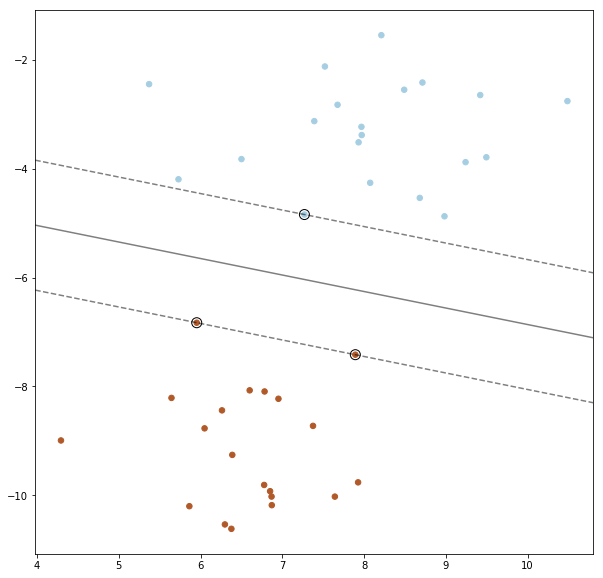

In [9]:
plot_svm()

# Modern neural networks

* The main difference is that the heaviside function is replaced by a smooth "activation" function, usually the so called sigmoid
$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$
* An LTU where we replace the activation with $\sigma$ is called an artificial neuron.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

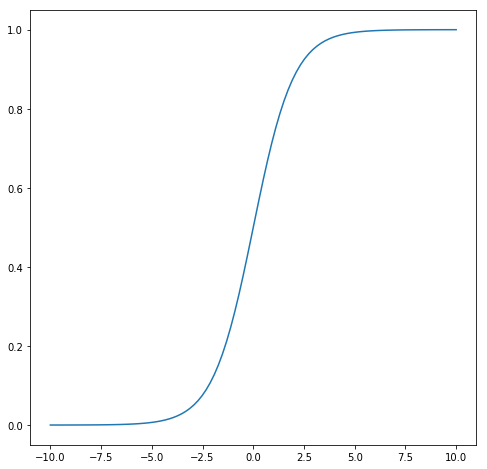

In [11]:
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.show()